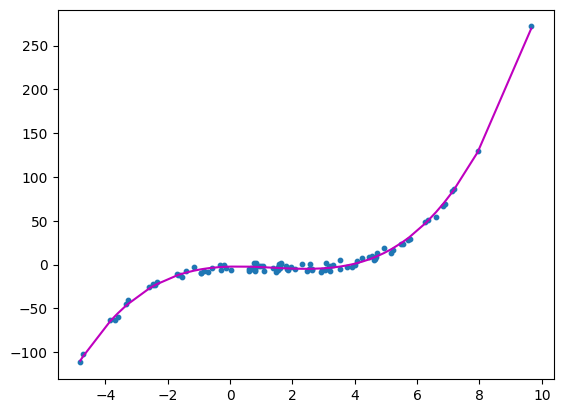

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import operator

# Generate some data
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

# Transform the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Define the polynomial features
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

# Fit the model
model = LinearRegression()
model.fit(x_poly, y)

# Visualize the results
plt.scatter(x, y, s=10)
# Sort the values of x before line plot
y_pred = model.predict(x_poly)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.plot(x, y_pred, color='m')
plt.show()


In [8]:
print("Original feature count :",len(x[0]))
print("Polynomail feature count : ",len(x_poly[0]))

4


In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from skopt import gp_minimize
from skopt.space import Integer
from skopt.plots import plot_convergence

# Function to find the best degree of polynomial using Bayesian optimization
def find_best_degree_bayesian(x, y, max_degree=10):
    # Define the objective function to minimize
    def objective(degree):
        poly = PolynomialFeatures(degree=int(degree))
        x_poly = poly.fit_transform(x)
        model = LinearRegression()
        scores = cross_val_score(model, x_poly, y, cv=5, scoring='neg_mean_squared_error')
        return -np.mean(scores)  # Minimize the negative MSE to maximize the score
    
    # Define the search space
    search_space = [Integer(1, max_degree, name='degree')]
    
    # Perform Bayesian optimization
    result = gp_minimize(objective, search_space, n_calls=20, random_state=42)
    
    # Extract the best degree and MSE
    best_degree = int(result.x[0])
    best_mse = -result.fun
    
    return best_degree, best_mse

# Find the best degree using Bayesian optimization
best_degree, best_mse = find_best_degree_bayesian(x, y)
print(f"Best degree: {best_degree}, Best MSE: {best_mse}")


ModuleNotFoundError: No module named 'skopt'